In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

577

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
from config import weather_api_key
import requests
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | baykit
Processing Record 2 of Set 12 | rikitea
Processing Record 3 of Set 12 | maldonado
Processing Record 4 of Set 12 | albany
Processing Record 5 of Set 12 | hithadhoo
Processing Record 6 of Set 12 | sao felix do xingu
Processing Record 7 of Set 12 | mataura
Processing Record 8 of Set 12 | inhambane
Processing Record 9 of Set 12 | yellowknife
Processing Record 10 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 12 | arraial do cabo
Processing Record 12 of Set 12 | faanui
Processing Record 13 of Set 12 | yakeshi
Processing Record 14 of Set 12 | jamestown
Processing Record 15 of Set 12 | hilo
Processing Record 16 of Set 12 | busselton
Processing Record 17 of Set 12 | saint-philippe
Processing Record 18 of Set 12 | shahrud
Processing Record 19 of Set 12 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 12 | bredasdorp
Processing Record 21 of Set 12 |

Processing Record 32 of Set 15 | isangel
Processing Record 33 of Set 15 | beyneu
Processing Record 34 of Set 15 | ippy
Processing Record 35 of Set 15 | qaanaaq
Processing Record 36 of Set 15 | kamenskoye
City not found. Skipping...
Processing Record 37 of Set 15 | nurota
Processing Record 38 of Set 15 | attawapiskat
City not found. Skipping...
Processing Record 39 of Set 15 | ballina
Processing Record 40 of Set 15 | waitati
Processing Record 41 of Set 15 | mar del plata
Processing Record 42 of Set 15 | dunedin
Processing Record 43 of Set 15 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 15 | hudiksvall
Processing Record 45 of Set 15 | nicoya
Processing Record 46 of Set 15 | dzaoudzi
Processing Record 47 of Set 15 | anloga
Processing Record 48 of Set 15 | port alfred
Processing Record 49 of Set 15 | kant
Processing Record 50 of Set 15 | cotonou
Processing Record 1 of Set 16 | san cristobal
Processing Record 2 of Set 16 | baoshan
Processing Record 3 of Set 16 | balkha

Processing Record 20 of Set 19 | lavrentiya
Processing Record 21 of Set 19 | los andes
Processing Record 22 of Set 19 | mareeba
Processing Record 23 of Set 19 | isiro
Processing Record 24 of Set 19 | vardo
Processing Record 25 of Set 19 | surt
Processing Record 26 of Set 19 | tra vinh
Processing Record 27 of Set 19 | hamilton
Processing Record 28 of Set 19 | palu
Processing Record 29 of Set 19 | warqla
City not found. Skipping...
Processing Record 30 of Set 19 | skalistyy
City not found. Skipping...
Processing Record 31 of Set 19 | santa isabel do rio negro
Processing Record 32 of Set 19 | caranavi
Processing Record 33 of Set 19 | baculin
Processing Record 34 of Set 19 | presidencia roque saenz pena
Processing Record 35 of Set 19 | yumen
Processing Record 36 of Set 19 | manggar
Processing Record 37 of Set 19 | nantucket
Processing Record 38 of Set 19 | klaksvik
Processing Record 39 of Set 19 | chagda
City not found. Skipping...
Processing Record 40 of Set 19 | roura
Processing Record 4

Processing Record 8 of Set 23 | hambantota
Processing Record 9 of Set 23 | rosario oeste
Processing Record 10 of Set 23 | tazovskiy
Processing Record 11 of Set 23 | rocha
Processing Record 12 of Set 23 | wadhwan
City not found. Skipping...
Processing Record 13 of Set 23 | olafsvik
Processing Record 14 of Set 23 | powell
Processing Record 15 of Set 23 | koson
Processing Record 16 of Set 23 | monrovia
Processing Record 17 of Set 23 | guicheng
City not found. Skipping...
Processing Record 18 of Set 23 | princeton
Processing Record 19 of Set 23 | taburi
City not found. Skipping...
Processing Record 20 of Set 23 | pahrump
Processing Record 21 of Set 23 | la gaulette
City not found. Skipping...
Processing Record 22 of Set 23 | rolim de moura
City not found. Skipping...
Processing Record 23 of Set 23 | ngunguru
Processing Record 24 of Set 23 | ambovombe
Processing Record 25 of Set 23 | yelahanka
Processing Record 26 of Set 23 | gamba
Processing Record 27 of Set 23 | san luis de gaceno
-------

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Baykit,61.6700,96.3700,67.39,69,97,8.99,RU,2021-08-03 02:09:12
1,Rikitea,-23.1203,-134.9692,69.60,57,44,21.00,PF,2021-08-03 02:09:13
2,Maldonado,-34.6667,-54.9167,47.59,93,0,3.56,UY,2021-08-03 02:07:10
3,Albany,42.6001,-73.9662,61.41,85,0,5.66,US,2021-08-03 02:09:14
4,Hithadhoo,-0.6000,73.0833,81.97,72,99,7.83,MV,2021-08-03 02:09:14
5,Sao Felix Do Xingu,-6.6447,-51.9950,72.93,47,5,1.54,BR,2021-08-03 02:09:14
6,Mataura,-46.1927,168.8643,50.49,76,20,4.41,NZ,2021-08-03 02:09:15
7,Inhambane,-23.8650,35.3833,66.60,74,12,11.54,MZ,2021-08-03 02:09:15
8,Yellowknife,62.4560,-114.3525,87.30,33,0,6.38,CA,2021-08-03 02:09:16
9,Arraial Do Cabo,-22.9661,-42.0278,66.06,82,0,6.91,BR,2021-08-03 02:09:17


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Baykit,RU,2021-08-03 02:09:12,61.6700,96.3700,67.39,69,97,8.99
1,Rikitea,PF,2021-08-03 02:09:13,-23.1203,-134.9692,69.60,57,44,21.00
2,Maldonado,UY,2021-08-03 02:07:10,-34.6667,-54.9167,47.59,93,0,3.56
3,Albany,US,2021-08-03 02:09:14,42.6001,-73.9662,61.41,85,0,5.66
4,Hithadhoo,MV,2021-08-03 02:09:14,-0.6000,73.0833,81.97,72,99,7.83
...,...,...,...,...,...,...,...,...,...
522,Ngunguru,NZ,2021-08-03 02:12:39,-35.6167,174.5000,60.17,75,49,27.63
523,Ambovombe,MG,2021-08-03 02:12:40,-25.1667,46.0833,64.45,74,7,6.49
524,Yelahanka,IN,2021-08-03 02:12:40,13.1075,77.6003,71.51,83,40,14.97
525,Gamba,GA,2021-08-03 02:12:40,-2.6500,10.0000,72.07,91,100,1.59


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

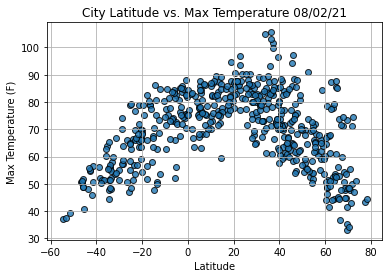

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

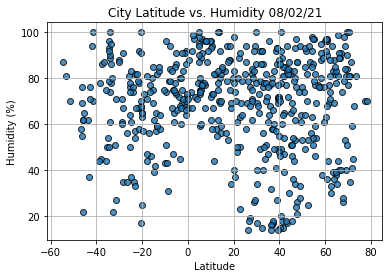

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

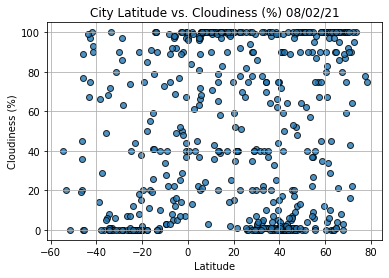

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

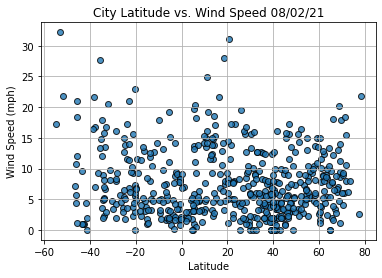

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()